<a href="https://colab.research.google.com/github/NourAyman05/Elevvo_Internship/blob/main/Copyyyy_Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Nour Ayman Abuelmagd

ID: 58-25596

Tutorial: 02

---

Name: Hana Tarek

ID: 58-22741

Tutorial: 02

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [2]:
df.info() #understanding the data and know the data type of each column and the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Building_ID             1100 non-null   object 
 1   Building_Type           990 non-null    object 
 2   Governorate             873 non-null    object 
 3   Neighborhood            1100 non-null   object 
 4   Day_of_Week             1100 non-null   object 
 5   Occupancy_Level         1100 non-null   object 
 6   Appliances_Usage_Level  1100 non-null   object 
 7   SquareFootage           1100 non-null   object 
 8   Last_Maintenance_Date   1100 non-null   object 
 9   Average_Temperature     990 non-null    float64
 10  Energy_Consumption      1100 non-null   object 
dtypes: float64(1), object(10)
memory usage: 94.7+ KB


In [3]:
df.describe() #to see the statistics of the numerical columns, whic is Average_Tempreature column here only

,Average_Temperature
count,990.000000
mean,33.499404
std,10.703806
min,-4.910000
25%,29.422500
50%,35.260000
75%,39.970000
max,50.000000


In [4]:
df.describe(include='all') # used to know the statistics of all columns (numerical and categorical) and knowing the unique values of each column

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
count,1100,990,873,1100,1100,1100,1100,1100,1100,990.000000,1100
unique,1100,3,3,848,42,3,3,1095,727,NaN,1100
top,BLD-2099-GL,Residential,Alexandria,Smouha,Sunday,High,Low,49653m2,2024-12-31,NaN,4722.59 kWh
freq,1,349,310,45,54,368,381,2,89,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.499404,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.703806,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.910000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.422500,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.260000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.970000,NaN


In [5]:
df.value_counts('Neighborhood') # to understand Neighborhood column and its values and know each value repeated how many times

,count
Neighborhood,
Smouha,45
Gleem,44
Dokki,41
Mohandessin,38
New Cairo,32
...,...
)Mohandessin3,1
)Mohandessin33,1
)Mohandessin66,1


In [6]:
df['Building_Type'].value_counts() #to know the mode of column Building_Type, which is Residential

,count
Building_Type,
Residential,349
Commercial,325
Industrial,316


In [7]:
df['Governorate'].value_counts() #to know the mode of column Governorate, which is Alexandria that has the highest count

,count
Governorate,
Alexandria,310
Giza,293
Cairo,270


In [8]:
df['Governorate'].mode() #to know the mode of column Governorate

,Governorate
0,Alexandria


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [9]:
df_Energy=df.copy() #making copy of the original dataframe
df_Energy. head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,SunDay,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,saturDAY,High,Low,38638m2,2023-07-07,50.00,5526.83 kWh
7,BLD-1007-SN,Residential,Cairo,New Cairo,tuesDAY,Medium,Low,34950m2,2020-07-29,38.51,4116.32 kWh
8,BLD-1008-BA,Industrial,Alexandria,Gleem(23,MoNday,High,High,29741m2,2024-12-31,43.62,5841.65 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,FRIDAY,Medium,High,17467,2023-01-14,33.18,3419.13 kWh


In [10]:
df_Energy['Day_of_Week']=df_Energy['Day_of_Week'].str.capitalize() #to make the days in standard format that the first letter of the word is capital and the other letters are small
df_Energy.head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,Tuesday,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh
5,BLD-1005-VX,Commercial,NaN,%9New Cairo,Sunday,Low,Medium,37377m2,2022-07-31,37.54,4687.67 kWh
6,BLD-1006-RC,Industrial,Cairo,Heliopolis_59,Saturday,High,Low,38638m2,2023-07-07,50.00,5526.83 kWh
7,BLD-1007-SN,Residential,Cairo,New Cairo,Tuesday,Medium,Low,34950m2,2020-07-29,38.51,4116.32 kWh
8,BLD-1008-BA,Industrial,Alexandria,Gleem(23,Monday,High,High,29741m2,2024-12-31,43.62,5841.65 kWh
9,BLD-1009-CG,Residential,NaN,=Mohandessin10,Friday,Medium,High,17467,2023-01-14,33.18,3419.13 kWh


In [11]:
df_Energy['Neighborhood'] = df_Energy['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand=False).str.strip() # we standardized the format of Neighborhood column and removed any other irrelevant symbols
df_Energy.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


In [12]:
temp = df_Energy.SquareFootage.str.split('m', expand=True) # we spritted column SquareFootage into 2 columns, one represents the values and the other represents the units to drop the units column and make the column SquareFootage to be with numeric data type only
temp

,0,1
0,7063,2
1,44372,2
2,19255,None
3,13265,None
4,13375,None
...,...,...
1095,1161,2
1096,37943,2
1097,1558,None
1098,2145,None


In [13]:
temp.columns = ['SquareFootage2', 'Unit'] #here we renamed the 0,1 columns to be SquareFootage2 and unit to easily drop the unit column
temp

,SquareFootage2,Unit
0,7063,2
1,44372,2
2,19255,None
3,13265,None
4,13375,None
...,...,...
1095,1161,2
1096,37943,2
1097,1558,None
1098,2145,None


In [14]:
temp = temp.drop('Unit', axis=1) #we droped unit column in temp
temp

,SquareFootage2
0,7063
1,44372
2,19255
3,13265
4,13375
...,...
1095,1161
1096,37943
1097,1558
1098,2145


In [15]:
df_Energy = df_Energy.drop('SquareFootage', axis=1) # we dropped SquareFootage column from the table because we will join/concatenate the temp to the table
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,3279.17 kWh
...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,3010.81 kWh
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,4248.49 kWh
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,2843.6 kWh
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,3348.39 kWh


In [16]:
df_Energy = df_Energy.join(temp) # we joined temp to the table so we made SquareFootage column to be in standardized format
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,SquareFootage2
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,2713.95 kWh,7063
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,5744.99 kWh,44372
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,4101.24 kWh,19255
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,3009.14 kWh,13265
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,3279.17 kWh,13375
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,3010.81 kWh,1161
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,4248.49 kWh,37943
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,2843.6 kWh,1558
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,3348.39 kWh,2145


In [17]:
df_Energy.rename(columns={'SquareFootage2': 'SquareFootage (m2)'}, inplace=True) # we renamed the column SquareFootage2 to be SquareFootage (m2) only (we already changed previously SquareFootage2 to SquareFootage then we runned it)
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,Energy_Consumption,SquareFootage (m2)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,2713.95 kWh,7063
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,5744.99 kWh,44372
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,4101.24 kWh,19255
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,3009.14 kWh,13265
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,3279.17 kWh,13375
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,3010.81 kWh,1161
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,4248.49 kWh,37943
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,2843.6 kWh,1558
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,3348.39 kWh,2145


In [18]:
temp2 = df_Energy.Energy_Consumption.str.split('kWh', expand=True) #we splitted column Energy_Consumption into 2 columns, one represents the values and the other represents the units to drop the units column and make the column Energy_Consumption to be with numeric data type only
temp2

,0,1
0,2713.95,
1,5744.99,
2,4101.24,
3,3009.14,
4,3279.17,
...,...,...
1095,3010.81,
1096,4248.49,
1097,2843.6,
1098,3348.39,


In [19]:
temp2.columns = ['Energy_Consumption', 'Unit'] #here we renamed the 0,1 columns to be Energy_Consumption2 and unit to easily drop the unit column
temp2

,Energy_Consumption,Unit
0,2713.95,
1,5744.99,
2,4101.24,
3,3009.14,
4,3279.17,
...,...,...
1095,3010.81,
1096,4248.49,
1097,2843.6,
1098,3348.39,


In [20]:
temp2 = temp2.drop('Unit', axis=1) #we droped unit column in temp2
temp2

,Energy_Consumption
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17
...,...
1095,3010.81
1096,4248.49
1097,2843.6
1098,3348.39


In [21]:
df_Energy = df_Energy.drop('Energy_Consumption', axis=1) # we dropped Energy_Consumption column from the table because we will join/concatenate the temp to the table
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,7063
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,44372
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,19255
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,13265
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,13375
...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,1161
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,37943
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,1558
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,2145


In [22]:
df_Energy= df_Energy. join(temp2) # we joined temp to the table so we made Energy_Consumption column to be in standardized format
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,7063,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,44372,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,19255,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,13265,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,13375,3279.17
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,1161,3010.81
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,37943,4248.49
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,1558,2843.6
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,2145,3348.39


In [23]:
df_Energy.rename(columns={'Energy_Consumption': 'Energy_Consumption (Kwh)'}, inplace=True) # we renamed Energy_Consumption column to Energy_Consumption (Kwh) [we already changed previously Energy_Consumption2 to Energy_Consumption then we runned it]
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.61,7063,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,NaN,44372,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.88,19255,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.06,13265,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.82,13375,3279.17
...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.85,1161,3010.81
1096,BLD-2096-RH,Residential,NaN,Dokki,Sunday,Medium,Medium,2024-10-31,36.23,37943,4248.49
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.00,1558,2843.6
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.43,2145,3348.39


In [24]:
df_Energy['Energy_Consumption (Kwh)']=df_Energy['Energy_Consumption (Kwh)'].astype(np.float64) # we changed the data type of column Energy_Consumption (Kwh) to be float instead of object
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Building_ID               1100 non-null   object 
 1   Building_Type             990 non-null    object 
 2   Governorate               873 non-null    object 
 3   Neighborhood              1100 non-null   object 
 4   Day_of_Week               1100 non-null   object 
 5   Occupancy_Level           1100 non-null   object 
 6   Appliances_Usage_Level    1100 non-null   object 
 7   Last_Maintenance_Date     1100 non-null   object 
 8   Average_Temperature       990 non-null    float64
 9   SquareFootage (m2)        1100 non-null   object 
 10  Energy_Consumption (Kwh)  1100 non-null   float64
dtypes: float64(2), object(9)
memory usage: 94.7+ KB


In [25]:
df_Energy['SquareFootage (m2)']=df_Energy['SquareFootage (m2)'].astype(np.int64) # we changed the data type of column SquareFootage (m2) to be int instead of object
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Building_ID               1100 non-null   object 
 1   Building_Type             990 non-null    object 
 2   Governorate               873 non-null    object 
 3   Neighborhood              1100 non-null   object 
 4   Day_of_Week               1100 non-null   object 
 5   Occupancy_Level           1100 non-null   object 
 6   Appliances_Usage_Level    1100 non-null   object 
 7   Last_Maintenance_Date     1100 non-null   object 
 8   Average_Temperature       990 non-null    float64
 9   SquareFootage (m2)        1100 non-null   int64  
 10  Energy_Consumption (Kwh)  1100 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 94.7+ KB


In [26]:
# Now we want to replace the missing values in column Average_Temperature with the mean
df_Energy['Average_Temperature'] = df_Energy['Average_Temperature'].fillna(df_Energy['Average_Temperature'].mean())
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Building_ID               1100 non-null   object 
 1   Building_Type             990 non-null    object 
 2   Governorate               873 non-null    object 
 3   Neighborhood              1100 non-null   object 
 4   Day_of_Week               1100 non-null   object 
 5   Occupancy_Level           1100 non-null   object 
 6   Appliances_Usage_Level    1100 non-null   object 
 7   Last_Maintenance_Date     1100 non-null   object 
 8   Average_Temperature       1100 non-null   float64
 9   SquareFootage (m2)        1100 non-null   int64  
 10  Energy_Consumption (Kwh)  1100 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 94.7+ KB


In [27]:
df_Energy.head(50)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh)
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.610000,7063,2713.95
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,33.499404,44372,5744.99
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.880000,19255,4101.24
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.060000,13265,3009.14
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.820000,13375,3279.17
5,BLD-1005-VX,Commercial,NaN,New Cairo,Sunday,Low,Medium,2022-07-31,37.540000,37377,4687.67
6,BLD-1006-RC,Industrial,Cairo,Heliopolis,Saturday,High,Low,2023-07-07,50.000000,38638,5526.83
7,BLD-1007-SN,Residential,Cairo,New Cairo,Tuesday,Medium,Low,2020-07-29,38.510000,34950,4116.32
8,BLD-1008-BA,Industrial,Alexandria,Gleem,Monday,High,High,2024-12-31,43.620000,29741,5841.65
9,BLD-1009-CG,Residential,NaN,Mohandessin,Friday,Medium,High,2023-01-14,33.180000,17467,3419.13


In [27]:
#Now we want to make feature engineer (create new column that calculates the number of days since the last maintenance)
today=pd.Timestamp.today() #to get the day of today
df_Energy['Last_Maintenance_Date']=pd.to_datetime(df_Energy['Last_Maintenance_Date']) #change the data type of column Last_Maintenance_Date to be date time not object
df_Energy['Days_since_last_maintenance']=(today-df_Energy['Last_Maintenance_Date']).dt.days #here we made the new column with formulae of today-days in Last_Maintenance_Date column, to get the number of days passed
df_Energy.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.610000,7063,2713.95,2120
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,33.499404,44372,5744.99,1335
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.880000,19255,4101.24,1702
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.060000,13265,3009.14,814
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.820000,13375,3279.17,1166


In [28]:
#Now we made another feature engineer (new column with function/formulae) that is called day_type
df_Energy['Day_type'] = df_Energy['Day_of_Week'].apply(lambda x: "Weekend" if x in ["Friday", "Saturday"] else "Weekday") # we created lamda for the if function that checks if "Day_of_week" column is weekday or weekend, so if its Saturday or Friday, then "Day_type" will be Weekend, otherwise its weekday
df_Energy.head(15)

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.610000,7063,2713.95,2120,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,33.499404,44372,5744.99,1335,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.880000,19255,4101.24,1702,Weekday
3,BLD-1003-HE,NaN,NaN,Dokki,Tuesday,Low,High,2023-07-30,35.060000,13265,3009.14,814,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.820000,13375,3279.17,1166,Weekday
5,BLD-1005-VX,Commercial,NaN,New Cairo,Sunday,Low,Medium,2022-07-31,37.540000,37377,4687.67,1178,Weekday
6,BLD-1006-RC,Industrial,Cairo,Heliopolis,Saturday,High,Low,2023-07-07,50.000000,38638,5526.83,837,Weekend
7,BLD-1007-SN,Residential,Cairo,New Cairo,Tuesday,Medium,Low,2020-07-29,38.510000,34950,4116.32,1910,Weekday
8,BLD-1008-BA,Industrial,Alexandria,Gleem,Monday,High,High,2024-12-31,43.620000,29741,5841.65,294,Weekday
9,BLD-1009-CG,Residential,NaN,Mohandessin,Friday,Medium,High,2023-01-14,33.180000,17467,3419.13,1011,Weekend


In [29]:
df_Energy['Governorate'].unique() # here we want to know the distinct values in Governorate column, that would help us to replace the missing values of this column to check if there are other values other than Alexandria, Cairo, Giza

array(['Alexandria', 'Giza', 'Cairo', nan], dtype=object)

In [30]:
df_Energy['Neighborhood'].unique() # here we want to see the distict values of "Neighborhood" column because it will help us in filling the missing values of "Governorate" column

array(['Smouha', 'Mohandessin', 'New Cairo', 'Dokki', 'Heliopolis',
       'Gleem', 'Maadi'], dtype=object)

In [32]:
# we will fill the missing values of "Governorate" based on "Neighborhood" as if the"Neighborhood" is "New Cairo"or "Heliopolis"or "Maadi", so the "Governorate will be "Cairo", if the if the"Neighborhood" is "Smouha"or"Gleem", "Governorate will be "Alexandria", otherwise the Governorate will be "Giza"
df_Energy['Governorate'] = df_Energy.apply (
    lambda row: (
        "Cairo" if row['Neighborhood'] in ["New Cairo", "Heliopolis", "Maadi"]
        else "Alexandria" if row['Neighborhood'] in ["Smouha", "Gleem"]
        else "Giza" if row['Neighborhood'] in ["Mohandessin", "Dokki"]
        else row['Governorate']),axis=1)
#here we check if Governorate will be of no missing values

In [33]:
df_Energy.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.610000,7063,2713.95,2120,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,33.499404,44372,5744.99,1335,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.880000,19255,4101.24,1702,Weekday
3,BLD-1003-HE,NaN,Giza,Dokki,Tuesday,Low,High,2023-07-30,35.060000,13265,3009.14,814,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.820000,13375,3279.17,1166,Weekday


In [34]:
df['Building_Type'].value_counts() # to know the number of occurence of each distinct value in the column

,count
Building_Type,
Residential,349
Commercial,325
Industrial,316


In [35]:
df['Building_Type'].mode() #to know what is the most repeated value in "Building_Type" column (mode)

,Building_Type
0,Residential


In [35]:
df_Energy["Building_Type"].fillna(df_Energy["Building_Type"].mode()[0], inplace=True) # here we replaced the missing values of "Building_Type" column by the mode (the most repeated value, which is Residential)
df_Energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Building_ID                  1100 non-null   object        
 1   Building_Type                1100 non-null   object        
 2   Governorate                  1100 non-null   object        
 3   Neighborhood                 1100 non-null   object        
 4   Day_of_Week                  1100 non-null   object        
 5   Occupancy_Level              1100 non-null   object        
 6   Appliances_Usage_Level       1100 non-null   object        
 7   Last_Maintenance_Date        1100 non-null   datetime64[ns]
 8   Average_Temperature          1100 non-null   float64       
 9   SquareFootage (m2)           1100 non-null   int64         
 10  Energy_Consumption (Kwh)     1100 non-null   float64       
 11  Days_since_last_maintenance  1100 non-null 

/tmp/ipython-input-3487555309.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Energy["Building_Type"].fillna(df_Energy["Building_Type"].mode()[0], inplace=True) # here we replaced the missing values of "Building_Type" column by the mode (the most repeated value, which is Residential)


In [36]:
df_Energy

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,Last_Maintenance_Date,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type
0,BLD-1000-UD,Residential,Alexandria,Smouha,Wednesday,High,Low,2020-01-01,28.610000,7063,2713.95,2120,Weekday
1,BLD-1001-AX,Commercial,Giza,Mohandessin,Tuesday,High,High,2022-02-24,33.499404,44372,5744.99,1335,Weekday
2,BLD-1002-IH,Industrial,Cairo,New Cairo,Sunday,Medium,Low,2021-02-22,37.880000,19255,4101.24,1702,Weekday
3,BLD-1003-HE,Residential,Giza,Dokki,Tuesday,Low,High,2023-07-30,35.060000,13265,3009.14,814,Weekday
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,2022-08-12,28.820000,13375,3279.17,1166,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,BLD-2095-OH,Commercial,Giza,Dokki,Saturday,High,Low,2022-04-21,27.850000,1161,3010.81,1279,Weekend
1096,BLD-2096-RH,Residential,Giza,Dokki,Sunday,Medium,Medium,2024-10-31,36.230000,37943,4248.49,355,Weekday
1097,BLD-2097-JZ,Commercial,Giza,Mohandessin,Sunday,Low,Medium,2021-04-18,20.000000,1558,2843.60,1647,Weekday
1098,BLD-2098-ZP,Industrial,Alexandria,Smouha,Saturday,Medium,Low,2023-09-14,34.430000,2145,3348.39,768,Weekend


## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

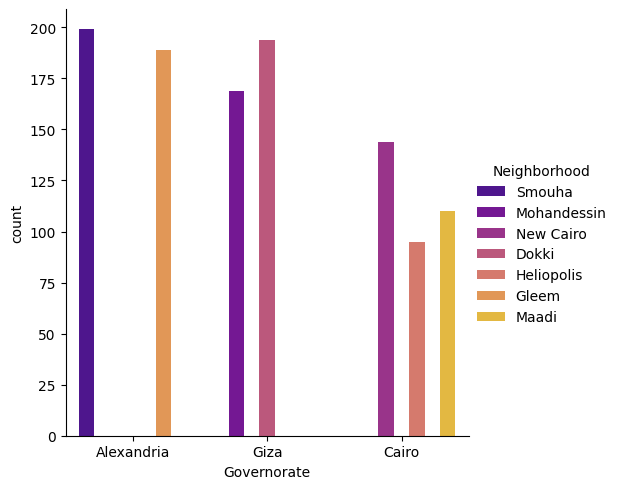

In [37]:
sns.catplot(x='Governorate', kind='count', hue='Neighborhood', palette='plasma', data= df_Energy);

**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [38]:
#Now we want to remove the columns that will be useless in modelling, these columns are "Building_ID": we will not interpret or understand somethig new from thhe id,"Day_of_Week": as we have "Day_Type column" which is more useful, "Last_Maintenance_Date": as we have "Days_since_last_maintenance" column that is more useful
df_Energy.drop(['Building_ID','Day_of_Week','Last_Maintenance_Date'], axis=1, inplace=True)
df_Energy

,Building_Type,Governorate,Neighborhood,Occupancy_Level,Appliances_Usage_Level,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type
0,Residential,Alexandria,Smouha,High,Low,28.610000,7063,2713.95,2120,Weekday
1,Commercial,Giza,Mohandessin,High,High,33.499404,44372,5744.99,1335,Weekday
2,Industrial,Cairo,New Cairo,Medium,Low,37.880000,19255,4101.24,1702,Weekday
3,Residential,Giza,Dokki,Low,High,35.060000,13265,3009.14,814,Weekday
4,Commercial,Alexandria,Smouha,Low,Low,28.820000,13375,3279.17,1166,Weekday
...,...,...,...,...,...,...,...,...,...,...
1095,Commercial,Giza,Dokki,High,Low,27.850000,1161,3010.81,1279,Weekend
1096,Residential,Giza,Dokki,Medium,Medium,36.230000,37943,4248.49,355,Weekday
1097,Commercial,Giza,Mohandessin,Low,Medium,20.000000,1558,2843.60,1647,Weekday
1098,Industrial,Alexandria,Smouha,Medium,Low,34.430000,2145,3348.39,768,Weekend


In [39]:
#we want to encode "Appliances_Usage_Level" and "Occupancy_Level" and "Day_type" columns
usage_map = {'Low': 1, 'Medium': 2, 'High': 3} # here we encodedthese 2 columns  "Appliances_Usage_Level" and "Occupancy_Level" by label encoding because label encoding will encode ordinal values,so Low will be 1 and Medium will be 2 and High will be 3
df_Energy['Appliances_Usage_Level'] = df_Energy['Appliances_Usage_Level'].map(usage_map) # here we used usage map to make the encoding process
df_Energy['Occupancy_Level'] = df_Energy['Occupancy_Level'].map(usage_map) # here we used usage map to make the encoding process
df_Energy

,Building_Type,Governorate,Neighborhood,Occupancy_Level,Appliances_Usage_Level,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type
0,Residential,Alexandria,Smouha,3,1,28.610000,7063,2713.95,2120,Weekday
1,Commercial,Giza,Mohandessin,3,3,33.499404,44372,5744.99,1335,Weekday
2,Industrial,Cairo,New Cairo,2,1,37.880000,19255,4101.24,1702,Weekday
3,Residential,Giza,Dokki,1,3,35.060000,13265,3009.14,814,Weekday
4,Commercial,Alexandria,Smouha,1,1,28.820000,13375,3279.17,1166,Weekday
...,...,...,...,...,...,...,...,...,...,...
1095,Commercial,Giza,Dokki,3,1,27.850000,1161,3010.81,1279,Weekend
1096,Residential,Giza,Dokki,2,2,36.230000,37943,4248.49,355,Weekday
1097,Commercial,Giza,Mohandessin,1,2,20.000000,1558,2843.60,1647,Weekday
1098,Industrial,Alexandria,Smouha,2,1,34.430000,2145,3348.39,768,Weekend


In [40]:
df_Energy= pd.get_dummies(data=df_Energy, columns=['Day_type', 'Building_Type','Governorate','Neighborhood'],drop_first=True, dtype='int8') #here we encoded "Day_type", "Building_Type", "Governorate","Neighborhood" columns by one-hot encoding because one-hot encoding will encode nominal values
df_Energy

,Occupancy_Level,Appliances_Usage_Level,Average_Temperature,SquareFootage (m2),Energy_Consumption (Kwh),Days_since_last_maintenance,Day_type_Weekend,Building_Type_Industrial,Building_Type_Residential,Governorate_Cairo,Governorate_Giza,Neighborhood_Gleem,Neighborhood_Heliopolis,Neighborhood_Maadi,Neighborhood_Mohandessin,Neighborhood_New Cairo,Neighborhood_Smouha
0,3,1,28.610000,7063,2713.95,2120,0,0,1,0,0,0,0,0,0,0,1
1,3,3,33.499404,44372,5744.99,1335,0,0,0,0,1,0,0,0,1,0,0
2,2,1,37.880000,19255,4101.24,1702,0,1,0,1,0,0,0,0,0,1,0
3,1,3,35.060000,13265,3009.14,814,0,0,1,0,1,0,0,0,0,0,0
4,1,1,28.820000,13375,3279.17,1166,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,3,1,27.850000,1161,3010.81,1279,1,0,0,0,1,0,0,0,0,0,0
1096,2,2,36.230000,37943,4248.49,355,0,0,1,0,1,0,0,0,0,0,0
1097,1,2,20.000000,1558,2843.60,1647,0,0,0,0,1,0,0,0,1,0,0
1098,2,1,34.430000,2145,3348.39,768,1,1,0,0,0,0,0,0,0,0,1


Y = 1716.240797 + 314.606152(Occupancy_Level)

## Modelling

_Apply the linear regression model below._

In [46]:
#Now we will split the dataframe into 2 dataframes x and y, x will be all columns without "Energy_Consumption (Kwh)" and y will be dataframe for "Energy_Consumption (Kwh)" only
from sklearn.model_selection import train_test_split

x = df_Energy.drop('Energy_Consumption (Kwh)',axis=1) # Independent variable
y = df_Energy['Energy_Consumption (Kwh)'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23) # here we split the datasets (x & y) into 80% training and 20% testing

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])
y

Training dataset size: 880
Testing dataset size: 220


,Energy_Consumption (Kwh)
0,2713.95
1,5744.99
2,4101.24
3,3009.14
4,3279.17
...,...
1095,3010.81
1096,4248.49
1097,2843.60
1098,3348.39


In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [49]:
# Now i want to calculate the coefficients of all independent variables and the constant for the linear equation
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,1716.240797
1,theta_1,Occupancy_Level,314.606152
2,theta_2,Appliances_Usage_Level,316.836961
3,theta_3,Average_Temperature,1.965263
4,theta_4,SquareFootage (m2),0.047930
5,theta_5,Days_since_last_maintenance,-0.079834
6,theta_6,Day_type_Weekend,-5.267468
7,theta_7,Building_Type_Industrial,467.113249
8,theta_8,Building_Type_Residential,-379.613745
9,theta_9,Governorate_Cairo,31.345146


**Yi = 1716.240797 + 314.606152(Occupancy_Level) + 316.836961(Appliances_Usage_Level)+ 1.965263(Average_Temperature) + 0.047930(SquareFootage (m2))- 0.079834 (Days_since_last_maintenance) - 5.267468(Day_type_Weekend)+  467.113249(Building_Type_Industrial) - 379.613745 (Building_Type_Residential) + 31.345146 (Governorate_Cairo) + 10.456183 (Governorate_Giza)+ 42.722205(Neighborhood_Gleem) + 22.302911(Neighborhood_Heliopolis) - 10.626955(Neighborhood_Maadi) +  14.979775(Neighborhood_Mohandessin) - 2.793246(Neighborhood_New Cairo) + 22.353440(Neighborhood_Smouha)**

## Model Evaluation

Evaluate the model you applied.

In [50]:
# Now we want to calculate the RMSE (Root Mean Square Error) that explains how close the actual data points are to the model’s values, and measures standard deviation of the residuals
# we also want to calcuate R^2 (R squared) that is the proportion of the variance in the dependent variable that is predictable from the independent variables, it's a statistical measure for the goodness of fit of a model

y_pred = lin_reg.predict(x_test)

from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_pred, y_test)

R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:',R_square)
#so here (RMSE) = 231.76252834078772 , which represents the average deviation between the predicted energy consumption and the actual energy consumption
# R^2 = 0.9396710228876696, which means that energy consumption (dependent variable) is strongly explainable or described by the independent variables

The root mean square error (RMSE) is:  231.76252834078772
R^2 obtained is: 0.9396710228876696


## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.